<a href="https://colab.research.google.com/github/Ishaan1977/ANNregression/blob/main/ANNregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [4]:
dset = pd.read_excel('/Folds5x2_pp.xlsx')
X = dset.iloc[:, :-1].values
y = dset.iloc[:, -1].values

In [5]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [21]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [8]:
print(X.shape)
print(y.shape)

(9568, 4)
(9568,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train)

In [10]:
print(X_train.shape)
print(y_train.shape)

(7654, 4)
(7654,)


###Building and compiling ANN

In [18]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))  # activation to be none for regression.
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 248783.6250
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11406.3672  
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 275.7909  
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261.5910  
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257.9198
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251.4994  
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 239.7467
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 231.9235  
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 216.8199  
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206.5869  
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 190.2014  
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178.3292
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165.3739  
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1

In [20]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[431.85 431.23]
 [462.86 460.01]
 [466.35 461.14]
 ...
 [473.61 473.26]
 [440.34 438.  ]
 [459.57 463.28]]


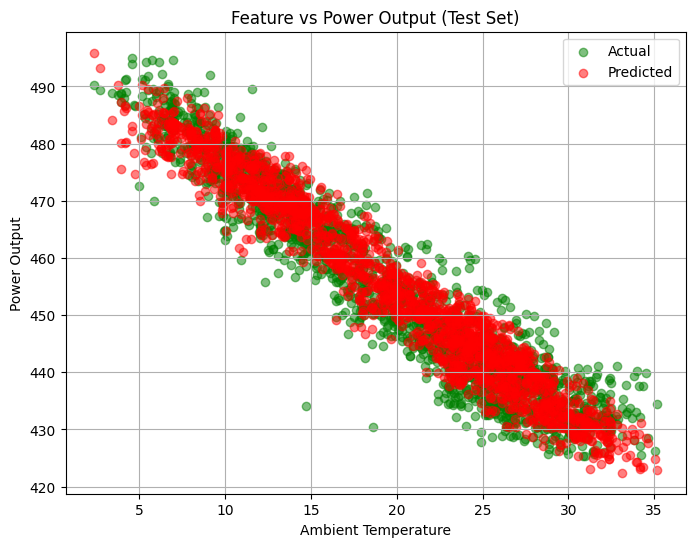

In [22]:
import matplotlib.pyplot as plt

x_feature = X_test[:, 0]

plt.figure(figsize=(8, 6))
plt.scatter(x_feature, y_test, color='green', alpha=0.5, label='Actual')
plt.scatter(x_feature, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Ambient Temperature')
plt.ylabel('Power Output')
plt.title('Feature vs Power Output (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


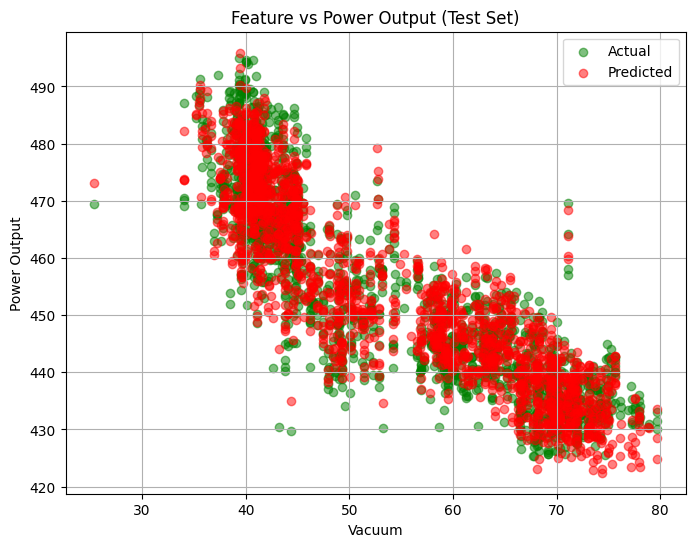

In [23]:
import matplotlib.pyplot as plt

x_feature = X_test[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x_feature, y_test, color='green', alpha=0.5, label='Actual')
plt.scatter(x_feature, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Vacuum')
plt.ylabel('Power Output')
plt.title('Feature vs Power Output (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


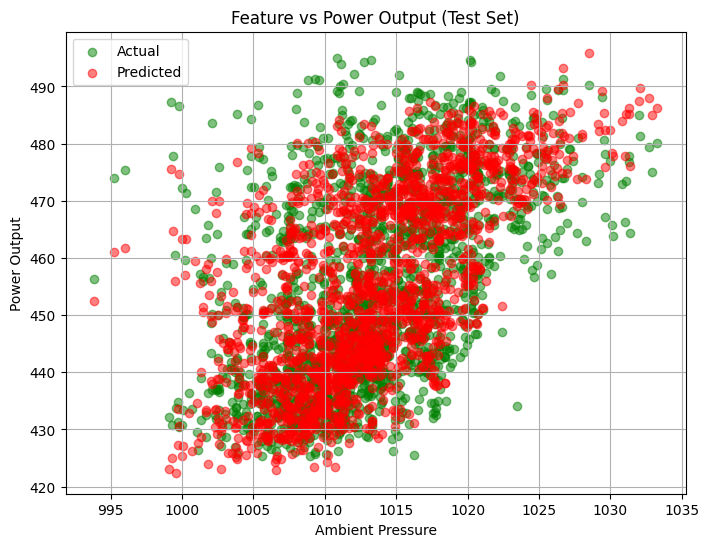

In [24]:
import matplotlib.pyplot as plt

x_feature = X_test[:, 2]

plt.figure(figsize=(8, 6))
plt.scatter(x_feature, y_test, color='green', alpha=0.5, label='Actual')
plt.scatter(x_feature, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Ambient Pressure')
plt.ylabel('Power Output')
plt.title('Feature vs Power Output (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


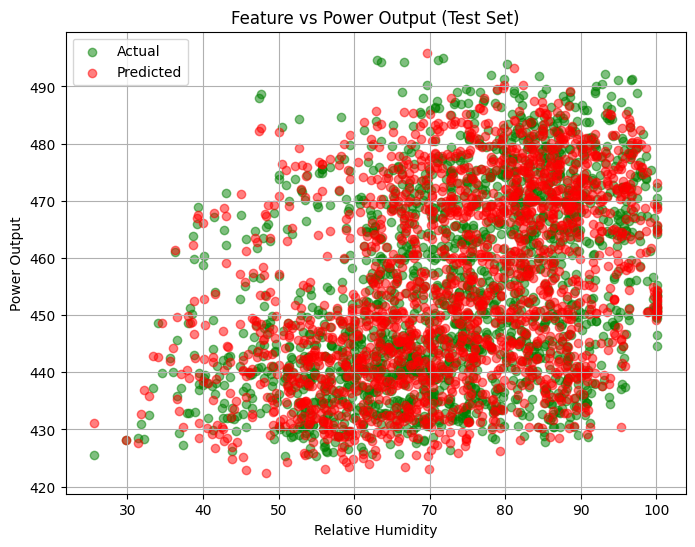

In [25]:
import matplotlib.pyplot as plt

x_feature = X_test[:, 3]

plt.figure(figsize=(8, 6))
plt.scatter(x_feature, y_test, color='green', alpha=0.5, label='Actual')
plt.scatter(x_feature, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Relative Humidity')
plt.ylabel('Power Output')
plt.title('Feature vs Power Output (Test Set)')
plt.legend()
plt.grid(True)
plt.show()
